In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Binary Classification

## Example Problem

- Input: Cat iamge
- Output: 1 (cat) vs 0 (non-cat)

An image is represented by a red-green-blue channel 2D image. i.e. if an image is 64x64 pixel image, then we have 3 64x64 matrices. 

In order to turn the pixels into a feature vector, we are going to unravel all of the pixel value into a single vector: $x$ = `[255, 231, ..., 255, 134...]`.

In a more formal notation,
$$n_x = 64 \times 64 \times 3 = 12288$$

## Notations

We have $m$ training examples.
$$\{(x^{(1)}, y^{(1)}), (x^{(1)}, y^{(1)}), (x^{(1)}, y^{(1)}), (x^{(1)}, y^{(1)}), ... (x^{(m)}, y^{(m)}) \}$$

Another notation that we need to know is that sometimes we want to treat a training example as a **single matrix**. For this course, and simple implementation of the neural network, we will stack our training examples **column wise**.

$$X = \Bigg[ x^{(1)}, x^{(2)}, ..., x^{(m)} \Bigg], X \in \mathbb{R}^{n_x \times m}$$

When we implement this in `numpy`, `X.shape = (n_x, m)`.

Accompanying $X$, we also have our $Y$ matrix, which is our $y$ values stacked **column wise**.

$$Y = \Bigg[y^{(1)}, y^{(2)}, y^{(3)}, ... , y^{(m)} \Bigg], Y \in \mathbb{R}^{1 \times m}$$

When we implement this in `numpy`, `Y.shape = (1, m)`.

If we forget about the notations, there's always the **notation guide** in the course to refer to!

# Logistic Regression

Given $x$, we want $\hat{y} = P(y = 1 \ | \ x)$

Since we know that $x \in \mathbb{R}^{n_x}$, our parameters will be $w \in \mathbb{R}^{n_x}$ and $b \in \mathbb{R}$.

Given the parameters, $w$ and $b$, how do we generate $\hat{y}$?

A wrong naive guess is to simply add then together as such
$$\hat{y} = w^Tx + b$$

But this isn't a great idea for binary classification because we want $\hat{y}$ to be the chance that $y = 1$. To limit this within the range of $0$ and $1$, we use the **sigmoid function** instead.
$$\hat{y} = \sigma(w^Tx + b)$$

Here's how a sigmoid function looks like:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Observe the following:

1. When $z$ is large, $\sigma(z) \approx \frac{1}{1 + 0} = 1$
2. When $z$ is small, $\sigma(z) \approx \frac{1}{1 + \text{big number}} \approx 0$

Therefore we are able to always have an output that is between 0 and 1. See below for a brief plot of the sigmoid function in `numpy`.

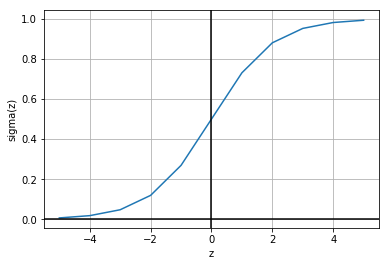

In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

plt.plot(np.arange(-5, 6), [sigmoid(z) for z in np.arange(-5, 6)])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True)
plt.ylabel('sigma(z)')
plt.xlabel('z')
plt.show()

## Notation Quirks

Sometimes the parameters $w$ and $b$ are defined together in a single matrix by simply adding another $x_0$ to our feature vector such that $X \in \mathbb{R}^{n_x + 1}$. This means that $\hat{y} = \sigma(\theta^{T}x)$. 

But for implementation simplicity, it is better to keep $w$ and $b$ as separate vectors, therefore keep this in mind when we implement our neural network. (It's slightly different from CS229's notation!)

# Logistic Regression Cost Function

To simplify what we are trying to achieve, given $\{(x^{(1)}, y^{(1)}), (x^{(1)}, y^{(1)}), (x^{(1)}, y^{(1)}), (x^{(1)}, y^{(1)}), ... (x^{(m)}, y^{(m)}) \}$, we want $\hat{y}^{(i)} \approx y^{(i)}$.

## Loss (error) function

A naive shot at the loss function would be the squared error, which is
$$\mathcal{L}(\hat{y}, y) = \frac{1}{2}(\hat{y} - y)^2$$

The optimisation problem if we use this loss function becomes non-convex. We will not get the global optima with this loss function. We will come back to this concept later.

A better loss function is:

$$\mathcal{L}(\hat{y}, y) = - \big(y\ \log\hat{y} + (1 - y)\ \log(1 - \hat{y}) \big)$$

Some observations for this loss function:

1. If $y = 1$, $\mathcal{L}(\hat{y}, y) = -log\hat{y}$. Which means that we want $log \hat{y}$ to be large, which implies that we want $\hat{y}$ to be large.
2. If $y = 0$, $\mathcal{L}(\hat{y}, y) = -log(1 - \hat{y})$. This means that we want $log (1 - \hat{y})$ to be large, which means we want $\hat{y}$ to be small.

The loss function is defined w.r.t to a single training example, but what if we want to know the performance on the entire training set?

## Cost function

$$J(w, b) = \frac{1}{m} \sum^{m}_{i = 1} \mathcal{L}(\hat{y}^{(i)}, y^{(i)})$$

If we substitute our definition for $\mathcal{L}(\hat{y}, y)$ into $J(w, b)$, we get:

$$J(w, b) = - \frac{1}{m} \sum^{m}_{i = 1} \big(y^{(i)} \log\hat{y}^{(i)} + (1 - y^{(i)})\log(1 - \hat{y}^{(i)}) \big)$$

Note that the negative sign is moved out of the summation.

# Gradient Descent

This is an algorithm that finds $w$ and $b$ that minimizes $J(w, b)$ as defined earlier. If we take $w$ and $b$ as two real numbers, we can see $J(w, b)$ as a **convex** surface. This still applies in a higher dimension of $w$.

In Gradient Descent, we take the step that lets us move downhill the most in the surface, until we can eventually converge towards the global optimal at the bottom of the surface.

The algorithm simply repeats this single step:

$$w := w - \alpha \frac{d J(w)}{d w}$$

In code, we can simply represent $\frac{d J(w)}{d w}$ as `dw`. This is a convention that will be used for the rest of the course.

## Example in a lower dimension

Let us suppose that $J(w)$ can be represented on a 2D plane, i.e. $w$ is one-dimensional.

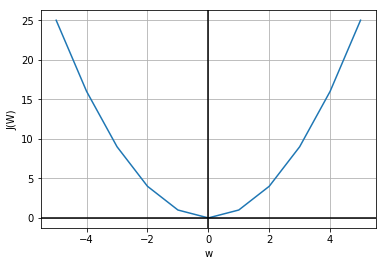

In [21]:
def sq(z):
    return np.square(z)

plt.plot(np.arange(-5, 6), [sq(z) for z in np.arange(-5, 6)])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True)
plt.ylabel('J(W)')
plt.xlabel('w')
plt.show()

Here's what we can observe:

1. If $\frac{d J(w)}{d w} < 0$, meaning that it has a negative slope, it will result in an increase in $w$ in the next iteration (towards the right)
2. If $\frac{d J(w)}{d w} > 0$, meaning that it has a positive slope, it will result in a decrease in $w$ in the next iteration (towards the left)

Performing these iterations will (hopefully) get us to the global optimal at $w = 0$.

## Actual Update

The actual update has to take into account that the cost function is affected by both $w$ and $b$. Therefore we have to update both variables in each iteration.

1. $w := \alpha \frac{\delta J(w, b)}{\delta w}$
2. $b := \alpha \frac{\delta J(w, b)}{\delta b}$

Note that we switched from $d$ into a $\delta$ (partial derivative) symbol here. This just mean that we are measuring the slope of the function w.r.t one variable. 

# Computation Graph

Suppose we are trying to compute $J(a, b, c) = 3(a + bc)$

Let $u = bc$, $v = a + u$, $J = 3v$.

We can now take these three steps and draw a computation graph.

(TODO: I'll fill this part up again when I figure out the best way to draw the computation graph in Jupyter)

# Gradient Descent with Logistic Regression

Forget about what we learnt in CS229, we're going to perform this gradient descent using the concept of computation graph in the previous video. Note that this is only on **ONE** training example.

Recall:

$$z = w^T x + b = w_1 x_1 + w_2 x_2 + b$$
$$\hat{y} = a = \sigma(z)$$
$$\mathcal{L}(\hat{y}, y) = - \big(y\ \log\hat{y} + (1 - y)\ \log(1 - \hat{y}) \big)$$

If we draw out the computation graph, we are going to first compute:

$$\frac{\delta \mathcal{L}(a, y)}{\delta a} = - \frac{y}{a} + \frac{1-y}{1-a}$$

Then we move backwards by one step and we get (by applying Chain Rule):

$$\frac{\delta \mathcal{L(a, y)}}{\delta z} = a - y$$

To get our partial derivatives for $w_1$ and $w_2$, we can perform chain rule again:

$$\frac{\delta \mathcal{L}(a, y)}{\delta w_1} = x_1 \times \frac{\delta \mathcal{L}(a, y)}{\delta z}$$

$$\frac{\delta \mathcal{L}(a, y)}{\delta w_2} = x_2 \times \frac{\delta \mathcal{L}(a, y)}{\delta z}$$

$$\frac{\delta \mathcal{L}(a, y)}{\delta b} = \frac{\delta \mathcal{L}(a, y)}{\delta z}$$

Now for each iteration of our gradient descent, we can apply the updates:

$$w_1 := w_1 + \alpha \frac{\delta \mathcal{L}(a, y)}{\delta w_1}$$
$$w_2 := w_2 + \alpha \frac{\delta \mathcal{L}(a, y)}{\delta w_2}$$
$$b := b + \alpha \frac{\delta \mathcal{L}(a, y)}{\delta z}$$

# Gradient Descent on $m$ Examples

Now we are going to try applying the same computation graph methods for $m$ training examples.

Recall that the cost function:

$$J(w, b) = \frac{1}{m} \sum^{m}_{i = 1} \mathcal{L}(\hat{y}^{(i)}, y^{(i)})$$

To find the partial derivative w.r.t $w_1$,

$$\frac{\delta}{\delta w_1} J(w, b) = \frac{1}{m} \sum^{m}_{i=1} \frac{\delta}{\delta w_1} \mathcal{L}(a, y)$$

We find that we can reuse of our previously found derivative from the single training example here too. So in each iteration, we have to write 2 for-loops, which is very inefficient.